<a href="https://colab.research.google.com/github/nikhilcms/Find-Image-Resolution-using-CNN-Regressor/blob/master/image_resolution_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':'1Hi_4sujlr-_ZlWl2YPXWS44lAT-cnvD6'})
downloaded.GetContentFile('training_data1.csv') 
downloaded2 = drive.CreateFile({'id':'1BUY0px8PkKQexlr3cA-hJjYq0hKqm7H7'})
downloaded2.GetContentFile('training_data2.csv')
downloaded2 = drive.CreateFile({'id':'1r2mJDTWDWInwE0TA9EKrGPxJIi0jMpW9'})
downloaded2.GetContentFile('training_data3.csv')
downloaded2 = drive.CreateFile({'id':'1DFN3y_beqdu6Dk0_ugmjgzHCe2hBMHSW'})
downloaded2.GetContentFile('training_data4.csv')
downloaded2 = drive.CreateFile({'id':'1Vu8wy_6waquJq-5HUE5g9pfcrTf9AoXU'})
downloaded2.GetContentFile('training_data5.csv')
downloaded2 = drive.CreateFile({'id':'1UAz6u-dbQcU14Wbvt5aKQz8w1hzB0u8U'})
downloaded2.GetContentFile('training_data6.csv')
downloaded2 = drive.CreateFile({'id':'1N3yPPDBbVS-S3XuWthnKlEo8pJUIwQaP'})
downloaded2.GetContentFile('training_data7.csv')

downloaded2 = drive.CreateFile({'id':'1hNWX3OXWP21jBy5CExP6CCEEoURi3LLA'})
downloaded2.GetContentFile('testing_data.csv')

In [ ]:
#! pip install Keras==2.1.6

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train_data1 = pd.read_csv("training_data1.csv")
train_data2 = pd.read_csv("training_data2.csv")
train_data3 = pd.read_csv("training_data3.csv")
train_data4 = pd.read_csv("training_data4.csv")
train_data5 = pd.read_csv("training_data5.csv")
train_data6 = pd.read_csv("training_data6.csv")
train_data7 = pd.read_csv("training_data7.csv")
test_data = pd.read_csv("testing_data.csv")

In [ ]:
train_data = pd.concat([train_data1,train_data2,train_data3,train_data4,train_data5,train_data6,train_data7],axis=0).reset_index()

In [ ]:
train_data.drop("index",axis=1,inplace=True)


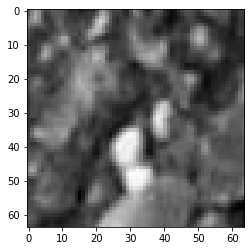

In [ ]:
from PIL import Image
image = train_data.iloc[np.random.randint(18059),0:4096]
image = np.array(image,dtype="int64").reshape(64,64)
plt.imshow(image,interpolation="none",cmap="gray")

In [ ]:
train_data.shape

(18059, 4097)

In [ ]:
test_data.shape

(2261, 4097)

In [ ]:
train_data["target"].value_counts()

33    486
77    479
36    399
45    394
95    380
     ... 
27     50
57     50
15     49
29     24
51      5
Name: target, Length: 86, dtype: int64

In [ ]:
test_data["target"].value_counts()

52    148
2     115
29    108
45    100
91    100
90    100
20     99
60     99
69     79
12     76
96     66
36     63
92     51
34     50
35     50
81     50
23     50
61     50
40     50
50     50
78     50
83     50
24     50
68     50
17     50
58     49
75     49
74     49
15     49
77     49
63     49
16     48
26     42
54     30
55     15
72      9
85      5
48      5
94      5
46      2
65      2
Name: target, dtype: int64

In [ ]:
train_ddata = train_data/255.0
test_ddata = test_data/255.0

In [ ]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.pipeline import Pipeline
from keras.layers import Convolution2D,MaxPooling2D,Dropout,Flatten,Dense,BatchNormalization
from keras.optimizers import adam
from keras import optimizers
from keras.losses import mean_squared_error
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
train_x = train_ddata.drop("target",axis=1).values
train_y = train_data.target.values
test_x = test_ddata.drop("target",axis=1).values
test_y = test_data.target.values

In [ ]:
train_y

array([46, 48, 58, ..., 74, 82, 78])

In [ ]:
test_y

array([45, 40, 45, ..., 52, 60, 48])

In [ ]:
train_x = train_x.reshape(18059,64,64)
train_target = train_y.reshape(18059,1)
test_x = test_x.reshape(2261,64,64)
test_target = test_y.reshape(2261,1)

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X_data,target,test_size=0.15,stratify=target)
X_train = train_x.reshape(train_x.shape[0],64,64,1)
X_test = test_x.reshape(test_x.shape[0],64,64,1)
y_train = train_target
y_test = test_target

In [ ]:
y_train

array([[46],
       [48],
       [58],
       ...,
       [74],
       [82],
       [78]])

In [ ]:
from keras import backend as K
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

from keras import optimizers
model = Sequential()
model.add(Convolution2D(16,kernel_size=(5,5),activation="relu",input_shape=(64,64,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides= 2))
model.add(Convolution2D(16,kernel_size=(5,5),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides= 2))
model.add(Convolution2D(32,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides= 2))
model.add(Convolution2D(32,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides= 2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

In [ ]:
#================================Using Adam Optimizer============================#
adam = optimizers.adam(lr=0.001, decay=1e-6)
model.compile(loss="mean_squared_error",optimizer= adam,metrics=["accuracy",coeff_determination])
history = model.fit(X_train,y_train,batch_size=128,epochs=45,verbose=1,validation_data=(X_test, y_test))





Train on 18059 samples, validate on 2261 samples
Epoch 1/45





18059/18059 [==============================] - 12s 689us/step - loss: 978.1182 - acc: 0.0102 - coeff_determination: -0.5627 - val_loss: 506.0067 - val_acc: 0.0159 - val_coeff_determination: 0.3241
Epoch 2/45
18059/18059 [==============================] - 5s 269us/step - loss: 365.8573 - acc: 0.0153 - coeff_determination: 0.4143 - val_loss: 380.8621 - val_acc: 0.0159 - val_coeff_determination: 0.4913
Epoch 3/45
18059/18059 [==============================] - 5s 265us/step - loss: 295.3777 - acc: 0.0194 - coeff_determination: 0.5271 - val_loss: 382.1797 - val_acc: 0.0168 - val_coeff_determination: 0.4897
Epoch 4/45
18059/18059 [==============================] - 5s 268us/step - loss: 268.7793 - acc: 0.0213 - coeff_determination: 0.5698 - val_loss: 333.5069 - val_acc: 0.0159 - val_coeff_determination: 0.5549
Epoch 5/45
18059/18059 [==============================] - 5s 266us/step - loss: 244.2564 - acc: 0.0231 - coeff_deter

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 16)        6416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 32)         

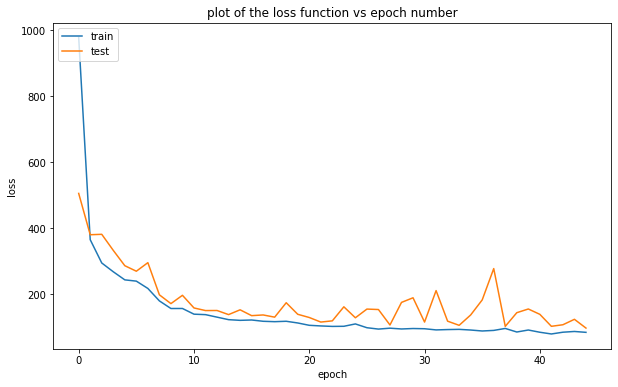

In [ ]:
#=======================plot of the loss function vs epoch number for the training set and the test set===================#
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('plot of the loss function vs epoch number')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

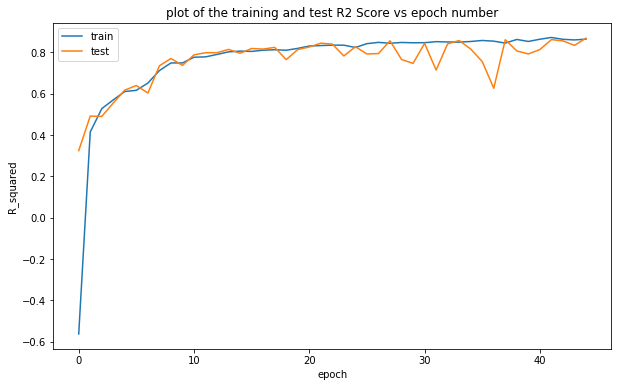

In [ ]:
#=====================plot of the training and test R 2 vs epoch number========================#
plt.figure(figsize=(10,6))
plt.plot(history.history["coeff_determination"])
plt.plot(history.history['val_coeff_determination'])
plt.title('plot of the training and test R2 Score vs epoch number')
plt.ylabel('R_squared')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#===================Making table of prediction and actual value==================#
prediction = model.predict(X_test)
actual = y_test
from sklearn.metrics import r2_score,mean_squared_error
R2_score = r2_score(actual,prediction)
print("R2 score for test_dataset is:",R2_score)
model.save('adam_resolution_model.h5')

R2 score for test_dataset is: 0.8697366215148966


In [ ]:
prediction

array([[55.364105],
       [45.81534 ],
       [42.56709 ],
       ...,
       [56.803314],
       [69.77859 ],
       [54.270916]], dtype=float32)

In [ ]:
from google.colab import files

In [ ]:
#===============making dataframe of actual,prediction for y_test=============#
prediction = prediction.astype("int64")
output = pd.concat([pd.DataFrame(prediction),pd.DataFrame(actual)],axis=1)
output.columns = ["Y_predict","Y_acutal"]
output.to_csv("adam_y_pred_actual_table.csv",index=None)
output.head()
#files.download("adam_y_pred_actual_table.csv") 

,Y_predict,Y_acutal
0,55,45
1,45,40
2,42,45
3,73,69
4,73,69


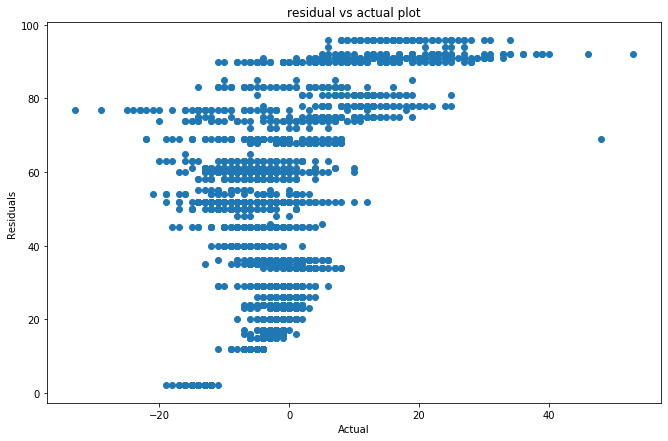

In [ ]:
#=====================Residual vs actual plot===================================#
y_residual = actual - prediction
y_actual = actual
plt.figure(figsize=(11,7))
plt.scatter(y_residual,y_actual)
plt.title('residual vs actual plot')
plt.ylabel('Residuals')
plt.xlabel('Actual')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#====================table of y_actual,y_predict,residual====================#
table_two = pd.concat([output,pd.DataFrame(y_residual)],axis=1)
table_two.columns = ["Y_predict","Y_acutal","Residual"]
table_two.to_csv("pred_act_residual.csv",index=None)
table_two.head()
#files.download("pred_act_residual.csv") 

,Y_predict,Y_acutal,Residual
0,55,45,-10
1,45,40,-5
2,42,45,3
3,73,69,-4
4,73,69,-4
